In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pickle
#%run helper_loans.py
pd.options.display.max_columns = 1000
plt.rcParams["figure.figsize"] = (15,10)
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.pipeline import Pipeline



In [3]:
import xgboost as xgb


In [4]:
def pickle_(obj, name):
    with open(name+".pkl", 'wb') as f:
        pickle.dump(obj, f, protocol=4)

In [5]:
import pickle
def unpickle_(pkl):
    return pickle.load(open(pkl, 'rb'))

In [13]:
df = unpickle_("CLASSIFICATION DF.pkl")

In [14]:
df.shape

(1646801, 155)

In [15]:
cols = list(df)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('loan_status_Late')))

In [16]:
df = df.ix[:, cols]

In [17]:
list(df)

['loan_status_Late',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'il_util',
 'max_bal_bc',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_ac

In [69]:
df.head(50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
loan_amnt,15000.00,21000.00,17900.00,10000.00,16625.00,2400.00,12000.00,8750.00,7025.00,16000.00,7000.00,4325.00,11200.00,8500.00,10000.00,35000.00,25475.00,14000.00,10500.00,28000.00,35000.00,3950.00,16000.00,12150.00,5000.00,17600.00,10000.00,8000.00,8000.00,21000.00,13600.00,6000.00,2500.00,10925.00,2500.00,24000.00,21000.00,11200.00,10000.00,19925.00,40000.00,5000.00,40000.00,5600.00,5000.00,6000.00,8400.00,25000.00,15000.00,3000.00
funded_amnt,15000.00,21000.00,17900.00,10000.00,16625.00,2400.00,12000.00,8750.00,7025.00,16000.00,7000.00,4325.00,11200.00,8500.00,10000.00,35000.00,25475.00,14000.00,10500.00,28000.00,35000.00,3950.00,16000.00,12150.00,5000.00,17600.00,10000.00,8000.00,8000.00,21000.00,13600.00,6000.00,2500.00,10925.00,2500.00,24000.00,21000.00,11200.00,10000.00,19925.00,40000.00,5000.00,40000.00,5600.00,5000.00,6000.00,8400.00,25000.00,15000.00,3000.00
funded_amnt_inv,15000.00,21000.00,17900.00,10000.00,16625.00,2400.00,12000.00,8750.00,7025.00,15975.00,7000.00,4325.00,11200.00,8500.00,10000.00,35000.00,25475.00,14000.00,10500.00,28000.00,35000.00,3950.00,16000.00,12150.00,5000.00,17600.00,10000.00,8000.00,8000.00,21000.00,13600.00,6000.00,2500.00,10925.00,2500.00,24000.00,20900.00,11200.00,10000.00,19925.00,40000.00,5000.00,40000.00,5575.00,5000.00,6000.00,8400.00,25000.00,15000.00,3000.00
int_rate,12.74,13.99,13.67,15.31,12.74,12.99,9.44,14.16,13.67,6.62,12.99,10.99,14.79,21.49,7.90,7.90,23.63,7.97,12.99,13.99,17.86,18.55,8.18,6.62,7.21,9.99,13.68,10.16,13.11,19.99,16.29,16.29,15.80,13.99,11.49,13.33,8.90,16.02,6.99,13.99,13.49,11.49,15.05,20.20,22.35,19.52,18.24,14.99,10.64,9.49
installment,503.54,488.53,608.92,348.18,558.09,80.86,384.06,299.74,238.98,491.26,235.83,141.58,387.11,322.39,312.91,1095.16,727.41,438.52,238.86,651.37,886.11,143.90,325.81,373.05,154.87,567.82,231.03,258.74,269.98,556.26,480.09,211.81,87.65,254.15,82.43,550.14,666.82,272.49,308.73,463.52,920.19,164.86,952.65,208.69,191.86,221.52,304.70,594.62,488.53,96.09
annual_inc,36000.00,115000.00,86000.00,46000.00,80000.00,55000.00,85000.00,40000.00,38855.00,46000.00,58000.00,58000.00,91200.00,30400.00,33093.00,90000.00,90000.00,62000.00,50000.00,125000.00,100000.00,21000.00,65000.00,67000.00,90000.00,146000.00,55000.00,78000.00,55100.00,182000.00,58980.00,30000.00,96000.00,70000.00,42000.00,96200.00,167000.00,39000.00,52000.00,300000.00,158000.00,38480.00,100000.00,50000.00,17052.00,120000.00,48000.00,85000.00,40000.00,75000.00
dti,18.60,16.37,3.71,9.03,8.63,30.94,22.11,24.54,18.04,1.57,7.97,15.02,16.58,19.15,26.51,17.44,28.80,20.17,17.23,16.61,19.04,23.03,15.40,12.84,22.04,17.62,10.84,11.51,21.67,14.22,28.48,11.12,16.95,10.58,14.03,25.04,11.49,28.49,9.28,2.10,20.04,18.37,17.24,25.42,38.71,4.28,23.65,23.63,15.48,20.42
delinq_2yrs,2.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
fico_range_low,670.00,665.00,675.00,675.00,665.00,670.00,765.00,660.00,660.00,755.00,670.00,740.00,670.00,660.00,730.00,755.00,670.00,710.00,665.00,695.00,670.00,660.00,755.00,755.00,700.00,670.00,735.00,720.00,700.00,700.00,685.00,675.00,700.00,695.00,665.00,670.00,690.00,680.00,710.00,725.00,680.00,660.00,820.00,660.00,665.00,700.00,670.00,710.00,670.00,670.00
fico_range_high,674.00,669.00,679.00,679.00,669.00,674.00,769.00,664.00,664.00,759.00,674.00,744.00,674.00,664.00,734.00,759.00,674.00,714.00,669.00,699.00,674.00,664.00,759.00,759.00,704.00,674.00,739.00,724.00,704.00,704.00,689.00,679.00,704.00,699.00,669.00,674.00,694.00,684.00,714.00,729.00,684.00,664.00,824.00,664.00,669.00,704.00,674.00,714.00,674.00,674.00


## Randomly Sample Data to control run time and save memory..

In [18]:
df=df.sample(frac=.1, random_state=0, axis=0).reset_index()

In [19]:
df.drop(columns = 'index', inplace=True)

In [20]:
df.shape

(164680, 155)

In [21]:
df.loan_status_Late.mean()

0.6083009472917172

In [15]:
non_dummy_var =['loan_status_Late', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_fico_range_high', 'last_fico_range_low', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies' ,'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort' ,'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'term_ 60 months']

In [15]:
df_wo_dummies = df[non_dummy_var]

['/bin/bash: df[non_dummy_var]: command not found']

In [ ]:
df_wo_dummies

In [29]:
def plot_corr_matrix(data):

    '''
    Heatmap of correlation matrix
    Inputs: dataframe
    Returns: Heatmap
            (Green + corr. Red - corr.)
    '''

    sns.set(font_scale=.8)#for label size

    ax = plt.axes()

    sns.heatmap(data.corr(), square=True, cmap='YlGnBu')

    ax.set_title('Correlation Matrix')

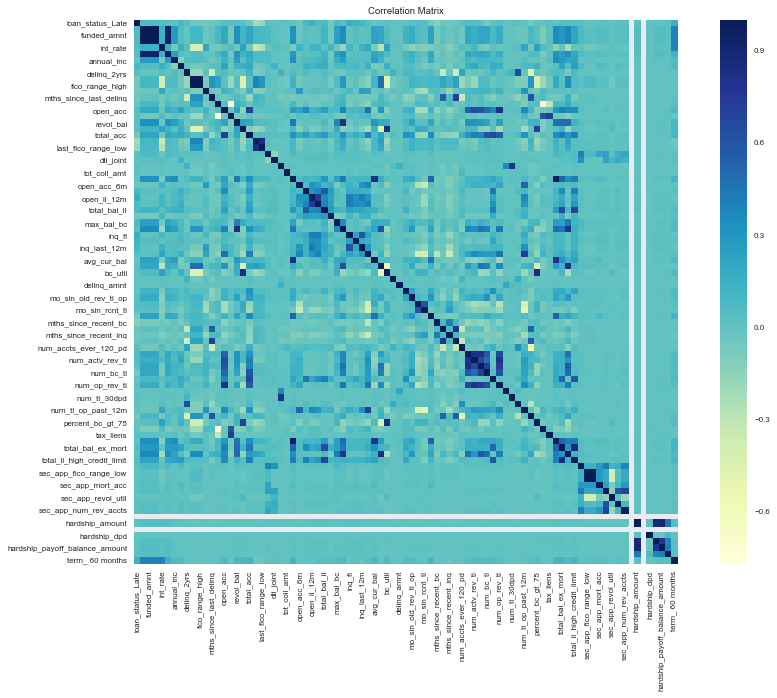

In [62]:
plot_corr_matrix(df_wo_dummies)

In [ ]:
df_wo_dummies

In [25]:
df_wo_dummies.to_pickle('df_wo_dummies_sample.pkl')

In [ ]:
df_wo_dummies

## This is to test after feature reduction to see scores and whats up

In [57]:
posfin_features2 = ['int_rate',
 'dti',
 'term_ 60 months',
 'bc_open_to_buy',
 'revol_util',
 'installment',
 'avg_cur_bal',
 'tot_hi_cred_lim',
 'revol_bal',
 'tot_cur_bal',
 'loan_amnt',
 'mo_sin_old_rev_tl_op',
 'total_bal_ex_mort',
 'total_acc',
 'mo_sin_old_il_acct',
 'mths_since_recent_bc',
 'acc_open_past_24mths',
 'mo_sin_rcnt_tl',
 'mo_sin_rcnt_rev_tl_op',
 'mths_since_last_delinq',
 'mths_since_recent_inq',
 'num_bc_tl',
 'annual_inc',
 'fico_range_low',
 'fico_range_high',
 'il_util',
 'max_bal_bc',
'loan_status_Late']

In [58]:
df_test = df[posfin_features2]

In [59]:
df_test.shape

(164680, 28)

In [ ]:
df_test.to_pickle('df_test1.pkl')

In [60]:
df_test.to_pickle('df_test_final_real1.pkl')

In [45]:
df_test.shape

(164680, 27)

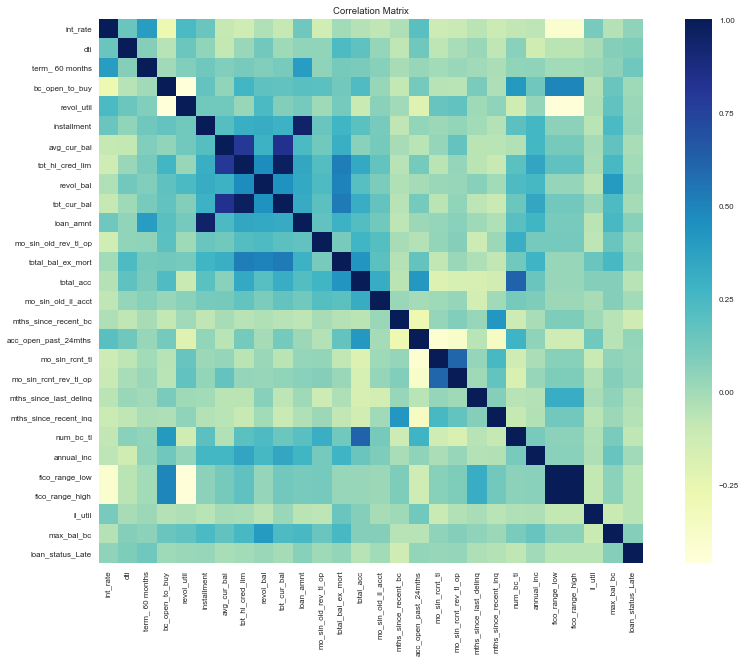

In [42]:
plot_corr_matrix(df_test)

## re-importance checking

In [46]:
Xtsd = pd.DataFrame(X1_train_scaled)

In [47]:
y_pred = rf1.predict(X1_test_scaled)

In [48]:
(metrics.mean_squared_error(y_pred, y1_test))

0.2857663347097401

In [49]:
feature_importances = pd.DataFrame(rf1.feature_importances_, index = Xtsd.columns, columns=['importance']).sort_values('importance',ascending=False)

In [50]:
feature_importances

,importance
26,0.126278
25,0.067970
1,0.045294
0,0.043059
8,0.040927
6,0.039861
5,0.038503
4,0.038394
11,0.037489
3,0.036804


# end of re-check

In [60]:
Xtsd = pd.DataFrame(X1_train_scaled)

In [61]:
y_pred = rf1.predict(X1_test_scaled)

In [62]:
(metrics.mean_squared_error(y_pred, y1_test))

0.29145008501335923

In [47]:
feature_importances = pd.DataFrame(rf1.feature_importances_, index = Xtsd.columns, columns=['importance']).sort_values('importance',ascending=False)

In [48]:
feature_importances

,importance
44,0.090138
43,0.072296
1,0.034734
0,0.031618
11,0.031053
6,0.030021
4,0.028639
8,0.028597
16,0.028169
7,0.027768


In [7]:
df = unpickle_('final_df.pkl')

In [8]:
ssX = StandardScaler()
y = df['loan_status_Late'].values
df.drop('loan_status_Late', inplace=True, axis=1)
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.transform(X_test)
# params = {'strategy': ["stratified", "most_frequent", "prior", "uniform", "constant"]}

In [13]:
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train_scaled, y_train) 
## And score it on your testing data.
rf.score(X_test_scaled, y_test)

0.7139421909157153

In [10]:
Xtsd = pd.DataFrame(X_train_scaled)

In [14]:
y_pred = rf.predict(X_test_scaled)

In [16]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = Xtsd.columns, columns=['importance']).sort_values('importance',ascending=False)

In [17]:
feature_importances

,importance
26,0.130596
13,0.054931
14,0.045789
0,0.042686
5,0.041695
18,0.040827
2,0.038785
3,0.038102
16,0.037506
15,0.036924


In [19]:
list(df)

['int_rate',
 'term_ 60 months',
 'revol_util',
 'installment',
 'loan_amnt',
 'mo_sin_old_rev_tl_op',
 'total_acc',
 'mo_sin_old_il_acct',
 'acc_open_past_24mths',
 'mths_since_last_delinq',
 'num_bc_tl',
 'fico_range_low',
 'fico_range_high',
 'il_util',
 'dti_log',
 'bc_open_to_buy_log',
 'avg_cur_bal_log',
 'tot_hi_cred_lim_log',
 'revol_bal_log',
 'tot_cur_bal_log',
 'total_bal_ex_mort_log',
 'mths_since_recent_bc_log',
 'mo_sin_rcnt_tl_log',
 'mo_sin_rcnt_rev_tl_op_log',
 'mths_since_recent_inq_log',
 'annual_inc_log',
 'max_bal_bc_log']

In [21]:
dffi = pd.DataFrame(data=list(df))

In [22]:
dffi

,0
0,int_rate
1,term_ 60 months
2,revol_util
3,installment
4,loan_amnt
5,mo_sin_old_rev_tl_op
6,total_acc
7,mo_sin_old_il_acct
8,acc_open_past_24mths
9,mths_since_last_delinq


In [28]:
dffi = feature_importances.join(dffi)

In [31]:
dffi = dffi.rename(columns={0: 'Features'})

In [39]:
dffi

,importance,Features
26,0.130596,max_bal_bc_log
13,0.054931,il_util
14,0.045789,dti_log
0,0.042686,int_rate
5,0.041695,mo_sin_old_rev_tl_op
18,0.040827,revol_bal_log
2,0.038785,revol_util
3,0.038102,installment
16,0.037506,avg_cur_bal_log
15,0.036924,bc_open_to_buy_log


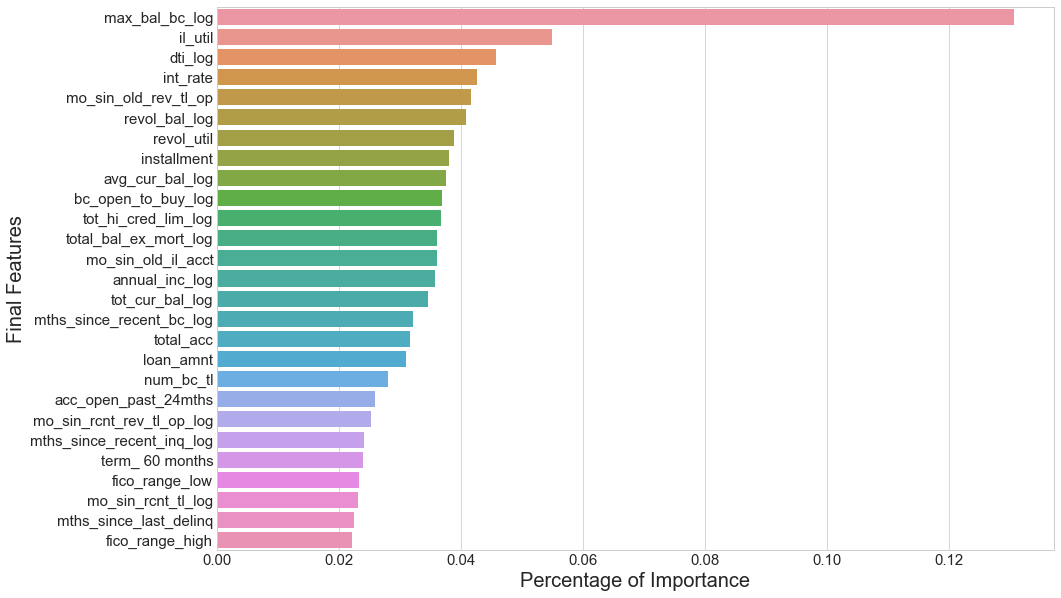

In [51]:
sns.set_style("whitegrid")
pal = sns.color_palette("Greens_d", len(data))
ax = sns.barplot(x='importance', y='Features', data=dffi)
ax.set_xlabel('Percentage of Importance', fontsize = 20)
ax.set_ylabel('Final Features', fontsize = 20)
ax.tick_params(labelsize=15)

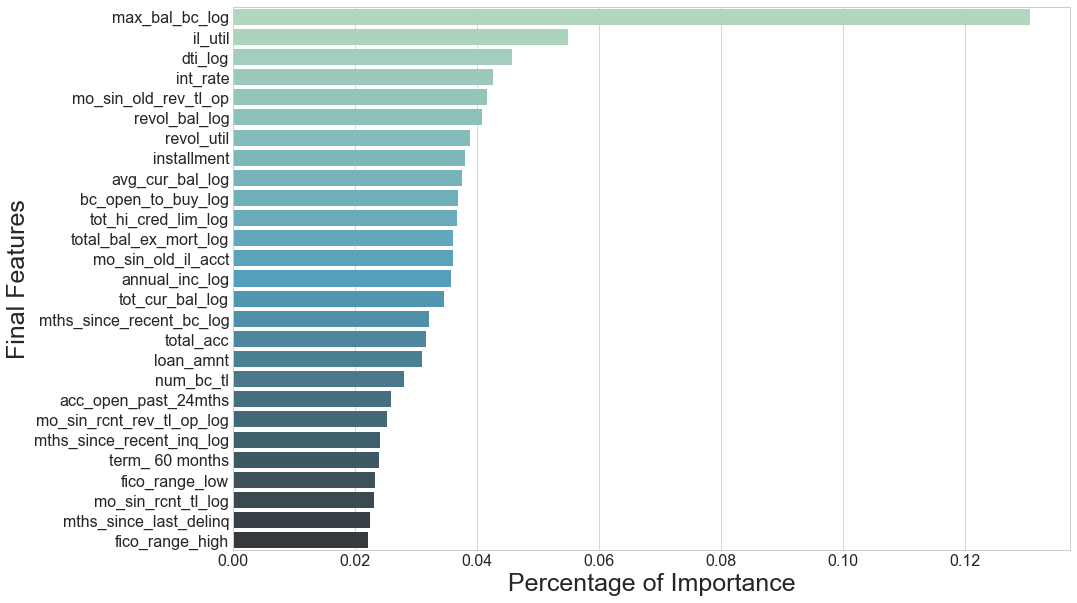

In [68]:
data = dffi
sns.set_style("whitegrid")
pal = sns.color_palette("GnBu_d", len(data))
ax = sns.barplot(x='importance', y='Features', data=dffi, palette=np.array(pal[::-1]))
ax.set_xlabel('Percentage of Importance', fontsize = 25)
ax.set_ylabel('Final Features', fontsize = 25)
ax.tick_params(labelsize=16)